In [1]:
import numpy as np
# from data_loader import LIBS_Toolkit
from LIBS_handler import LIBS_Toolkit
import matplotlib.pyplot as plt
from skimage import io
from scipy.ndimage import gaussian_filter
import os

%load_ext autoreload

In [2]:
%autoreload 1
%autoreload 2

# 1. Initialize Class

In [3]:
fname = r"E:/Data/Data_LIBS/Vidros/mixed_dset_pro"

In [4]:
libs_mainupulator = LIBS_Toolkit(fname, overwrite = True)

## 1.1 Load the Dataset

In [5]:
libs_mainupulator.load_dataset(baseline_corrected = True)

In [21]:
# libs_mainupulator.update_elements(["V", "Cr", "S", "O", "Si", "Mn", "P"])

## 1.2 Perform basic preprocessing

 -> Baseline Removal 
 
 -> Normalize to Sum

In [6]:
# _ = libs_mainupulator.baseline_correct()
_ = libs_mainupulator.normalize_to_sum()

## 1.3 Basic Visualization of Single Emission line along with average Spectrum

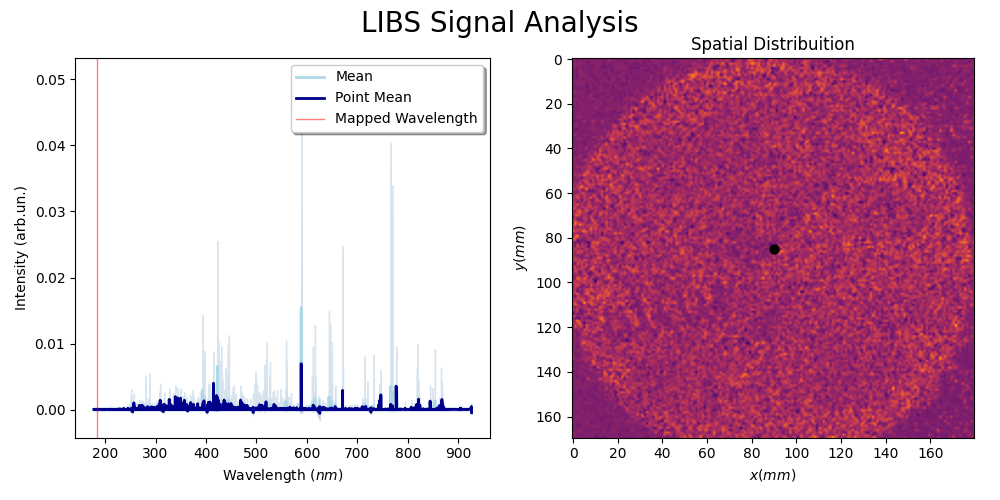

In [41]:
%matplotlib widget
libs_mainupulator.standard_analysis(radius = 5)

## 1.4 Save all lines for analysis

In [10]:
element_table = [{"Element": "Si", "Emission Lines": [288.13, 252.82, 250.57, 252.3]},
                 {"Element": "O" , "Emission Lines": [777.12, 777.34, 715.59, 615.98]},
                 {"Element": "Na", "Emission Lines": [588.87, 589.47, 568.7, 568.12]},
                 {"Element": "K" , "Emission Lines": [766.4, 769.77]},
                 {"Element": "Ca", "Emission Lines": [422.67, 430.27, 445.45, 643.89, 646.27]},
                 {"Element": "Mn", "Emission Lines": [279.5, 279.77, 279.97, 403.07]},
                 {"Element": "Al", "Emission Lines": [396.09, 309.22, 394.34, 308.17, 257.48]},
                 {"Element": "Fe", "Emission Lines": [259.89, 275.52, 261.15, 273.93]},
                 {"Element": "Mg", "Emission Lines": [285.18, 383.76, 383.15, 518.22, 278.12]},
                 {"Element": "Cr", "Emission Lines": [358.06, 302.03, 425.43]},
                 {"Element": "Co", "Emission Lines": [356.96, 340.42, 350.35, 345.31]},
                 {"Element": "Ga", "Emission Lines": [417.26, 403.35, 287.56]},
                 {"Element": "Cr", "Emission Lines": [302.01, 425.43]},
                 {"Element": "Ba", "Emission Lines": [553.69, 611.2, 649.93]},
                 {"Element": "Pb", "Emission Lines": [261.49, 283.09, 368.32]},
                 {"Element": "Sr", "Emission Lines": [460.68, 548.07, 481.01]},
                 {"Element": "Zr", "Emission Lines": [339.2, 343.82, 349.62, 468.78, 471.01, 473.95]},
                 {"Element": "Hf", "Emission Lines": [356.14, 339.96, 713.11]},
                 {"Element": "Zn", "Emission Lines": [334.46, 330.25, 328.28]}]

from matplotlib.colors import LogNorm
sigma = 0.5
for i in range(len(element_table)):
    element = element_table[i]["Element"]
    lines = element_table[i]["Emission Lines"]
    for j, line in enumerate(lines):
        directory = f"Images/{element}"
        os.makedirs(directory, exist_ok = True)
        mmap = gaussian_filter(libs_mainupulator.dataset[:, :, libs_mainupulator.wavelength_to_index(line)], sigma = sigma)

        fig, ax = plt.subplots(figsize = (6, 6))
        cax = ax.imshow(mmap, cmap = 'gist_earth', norm = LogNorm())
        cbar = fig.colorbar(cax, ax = ax, fraction = 0.046, pad = 0.04)
        ax.axis('off')
        plt.savefig(f"{directory}/Aligned{line}nm.png", bbox_inches = 'tight')
        plt.close() 

# 2. Feature Extraction

## 2.1 Perform automatic feature extraction using the FFT Algorithm

In [7]:
# fft_metric = libs_mainupulator.automatic_feature_extraction(n_features = 40, sigma = 1)

In [22]:
libs_mainupulator.automatic_feature_extraction(sigma = 1, fft_features = 1, int_features = 100, perform_fft = False, int_prominence = 0.1)

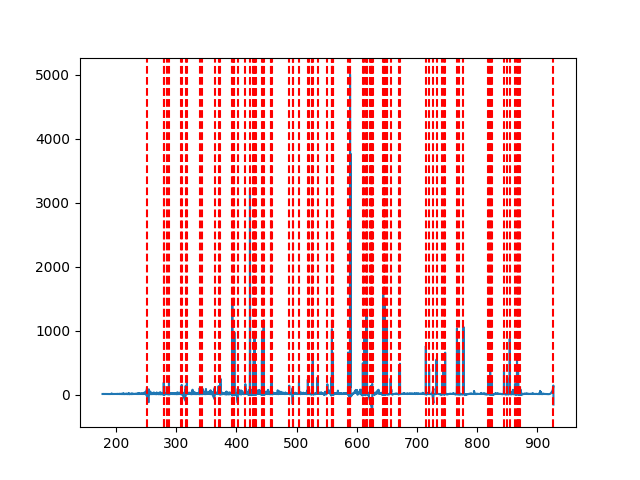

In [23]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(libs_mainupulator.wavelengths, np.mean(libs_mainupulator.dataset, axis = (0,1)))
_ = [ax.axvline(libs_mainupulator.x_features[i], color = 'r', ls = '--') for i in range(len(libs_mainupulator.x_features))]

# ax1 = ax.twinx()
# ax1.plot(libs_mainupulator.wavelengths, fft_metric, color = 'k', alpha = 0.6, lw = 0.4)

## 2.2 Visualize all the extracted features along with respective wavelengths

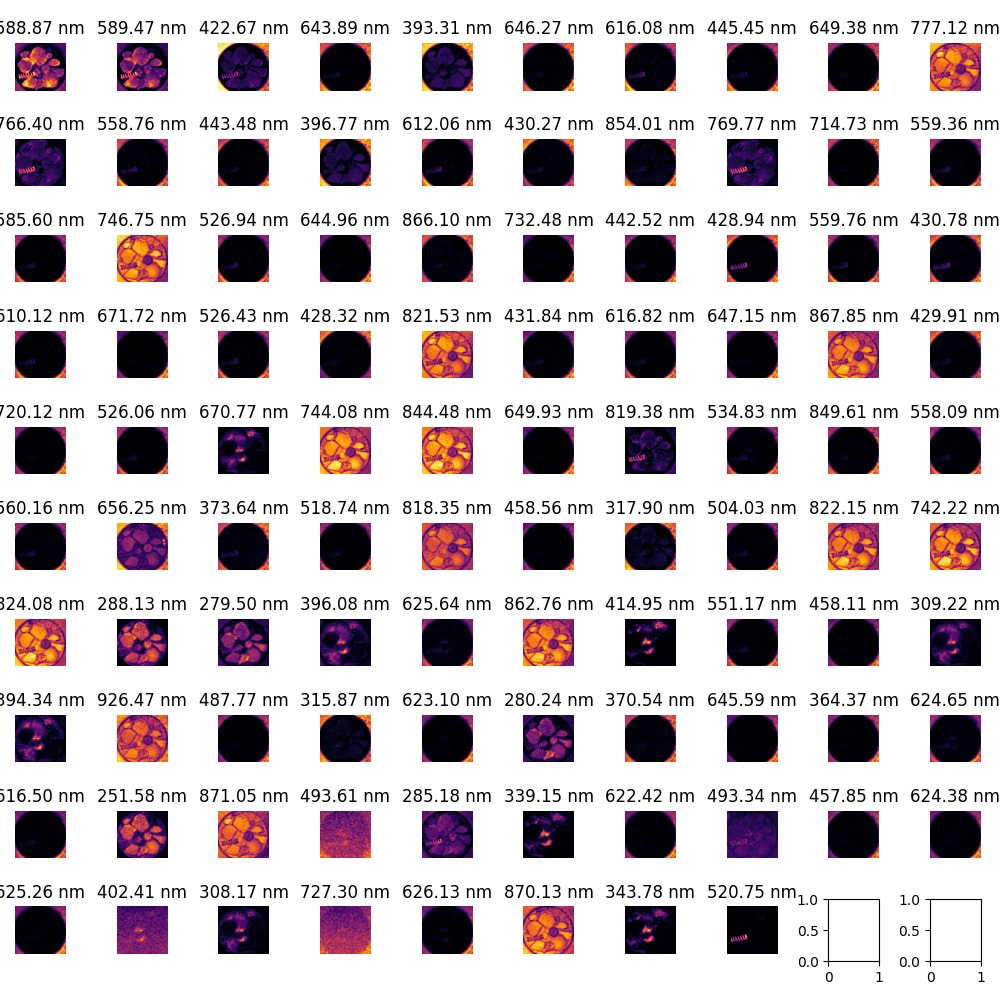

In [24]:
fig, axs = plt.subplots(10, 10, figsize = (10, 10))
axs = axs.flatten()
for i in range(libs_mainupulator.features.shape[0]):
    ax = axs[i]
    ax.imshow(libs_mainupulator.features[i], cmap = 'inferno')
    ax.set_title(f"{libs_mainupulator.x_features[i]:.2f} nm")
    ax.axis('off')
fig.tight_layout()

## 2.3 Identify the extracted features

In [25]:
identified_elements = libs_mainupulator.id_features(wavelength_tolerance = 0.1)
libs_mainupulator.detailed_ids()

Identified Elements:
Ca:
  - Feature at 422.67 nm matches reference line at 422.67 nm
    Relative Intensity: 1.000, Category: High Intensity
  - Feature at 643.89 nm matches reference line at 643.91 nm
    Relative Intensity: 0.160, Category: Low Intensity
  - Feature at 646.27 nm matches reference line at 646.26 nm
    Relative Intensity: 0.111, Category: Low Intensity
  - Feature at 445.45 nm matches reference line at 445.48 nm
    Relative Intensity: 0.162, Category: Low Intensity
  - Feature at 649.38 nm matches reference line at 649.38 nm
    Relative Intensity: 0.075, Category: Low Intensity
  - Feature at 443.48 nm matches reference line at 443.50 nm
    Relative Intensity: 0.089, Category: Low Intensity
  - Feature at 430.27 nm matches reference line at 430.25 nm
    Relative Intensity: 0.164, Category: Low Intensity
  - Feature at 559.36 nm matches reference line at 559.45 nm
    Relative Intensity: 0.048, Category: Ultra low Intensity
  - Feature at 526.94 nm matches referen

In [26]:
libs_mainupulator.print_element_probabilities()

Estimated Element Probabilities:
Ca: 58.82%
V: 10.25%
Fe: 6.49%
Ti: 6.22%
O: 3.83%
K: 3.75%
Cr: 3.59%
Al: 2.09%
Li: 1.39%
Si: 1.08%
Co: 0.95%
Mn: 0.68%
Pb: 0.49%
Mg: 0.38%


# 3. Classification

## 3.1 Perform k-means clustering

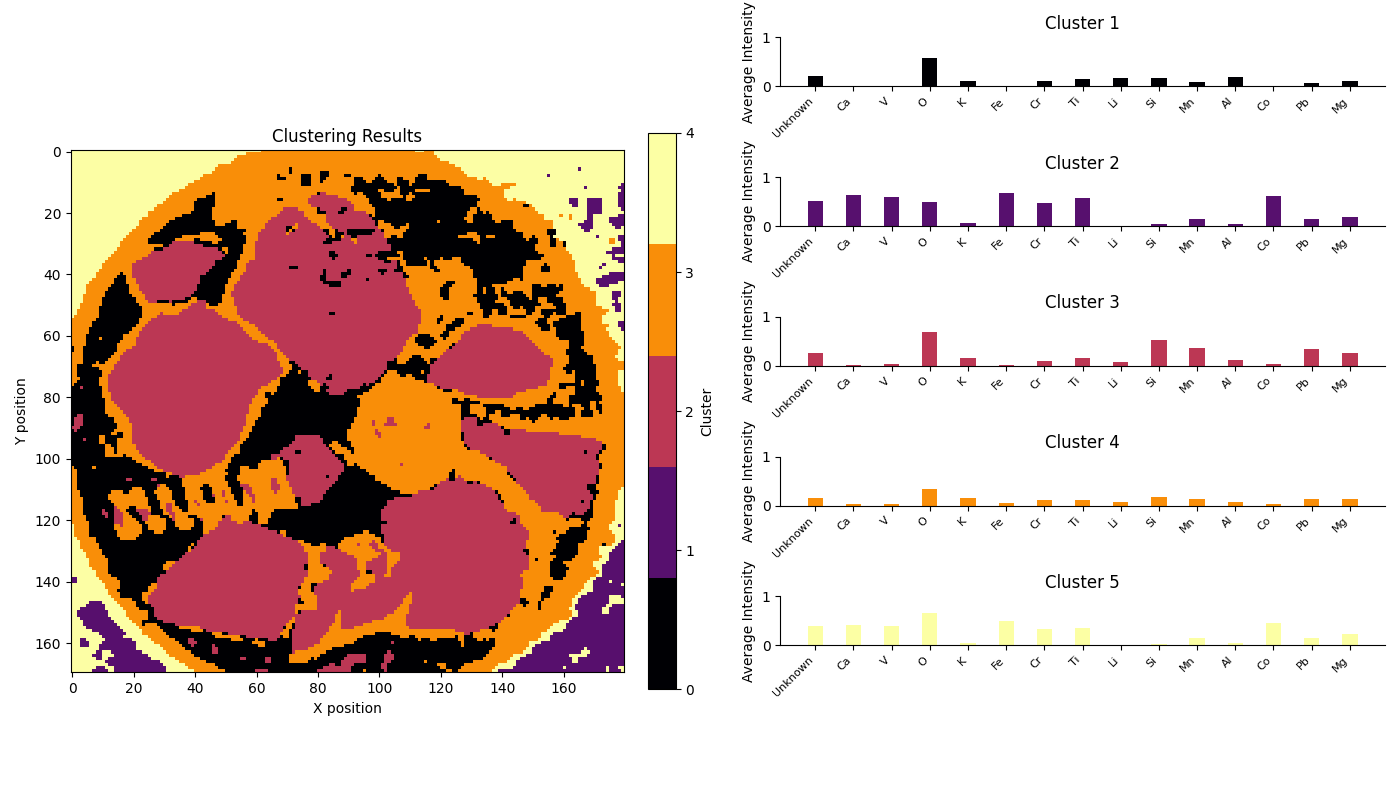

In [27]:
labelled, cluster_probabilities = libs_mainupulator.analyze_clusters(n_clusters = 5, random_state = 5)

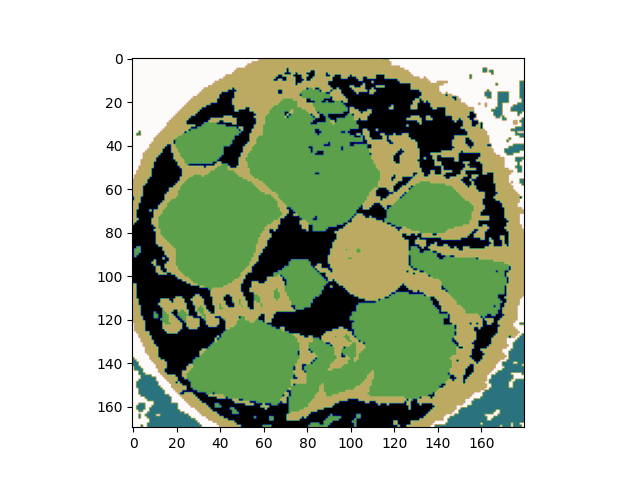

In [21]:
plt.figure()
plt.imshow(labelled, cmap = 'gist_earth')

# ToDo: Map of the relative intensity of each detected element in each cluster

## Extra Load single wavelength (takes too long)

In [19]:
im = libs_mainupulator.load_single_wavelength(345.32, plot = False)

# A. Testing

In [18]:
from LIBS_SPEC.element_new import element

element_data = element(["Rb"])
ll = element_data.generate_lines_database(max_ion_state=1, lower_limit = 200., upper_limit =900.)

In [6]:
from LIBS_SPEC.line_handler import EmissionToolkit

toolkit = EmissionToolkit(element_list = ["Zr", "Hf", "As"]) #"Se" not loaded
toolkit.generate_database()

,Element,Ion,Line,Relative Intensity
0,Zr,3,200.19097,0.006373
1,Zr,3,200.32325,0.000147
2,Zr,3,200.44650,0.000437
3,Zr,3,200.46218,0.000036
4,Zr,3,200.68101,0.421687
...,...,...,...,...
230,As,1,249.29300,0.034802
231,As,1,274.49900,0.092857
232,As,1,278.02200,0.278571
233,As,1,286.04300,0.117845


In [8]:
toolkit.process_database(ion_num = 1)

array([['Hf', 1, 368.22, 1.0, 'High Intensity'],
       ['As', 1, 278.02, 0.279, 'Low Intensity'],
       ['Hf', 1, 417.43, 0.275, 'Low Intensity'],
       ['As', 1, 286.04, 0.118, 'Low Intensity'],
       ['As', 1, 274.5, 0.093, 'Low Intensity'],
       ['As', 1, 289.87, 0.021, 'Ultra low Intensity']], dtype=object)